In [ ]:
import pandas as pd
import numpy as np

In [97]:
data = pd.read_excel('/Users/henrysalgado/Desktop/Coache Data Analysis/Samples/sample4_tenure.xlsx')
non_response_codes = [96, 97, 98, 99]
data.replace(non_response_codes, np.nan, inplace=True)
data.describe()


,demo_inst_id,hacu_hsi,demo_tenure,demo_rank,demo_race,demo_gender,demo_is_clinical,demo_is_parent_any,demo_is_parent_itp,demo_is_parent_k12,...,q270b_18,q270b_19,q270b_20,q270b_21,q270b_22,q270b_23,q270b_24,q270b_25,q270b_98,q305
count,4021.000000,4021.0,4021.000000,4021.000000,4019.000000,4021.000000,3273.0,4021.000000,4021.000000,4021.000000,...,4021.0,4021.0,4021.0,4021.0,4021.0,4021.0,4021.0,4021.0,4021.0,1606.000000
mean,240.883114,1.0,2.742104,3.132803,3.326449,1.930863,0.0,0.515046,0.159662,0.312609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.435866
std,88.933391,0.0,0.437531,0.883385,10.302803,4.471101,0.0,0.499836,0.366338,0.463614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.496024
min,126.000000,1.0,2.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,135.000000,1.0,2.000000,2.000000,2.000000,1.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,243.000000,1.0,3.000000,3.000000,2.000000,2.000000,0.0,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,319.000000,1.0,3.000000,4.000000,2.000000,2.000000,0.0,1.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,404.000000,1.0,3.000000,5.000000,91.000000,91.000000,0.0,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


All things considered, your department as a place to work


1	Strongly disagree
2	Somewhat disagree
3	Neither agree nor disagree
4	Somewhat agree
5	Strongly agree

In [98]:
data["q250b"].value_counts()

4.0    1515
3.0     776
5.0     649
2.0     472
1.0     228
Name: q250b, dtype: int64

In [99]:
print("Participants with missing data :", data['q250b'].isna().sum())

Participants with missing data : 381


In [100]:
data['binary_satisfaction'] = np.where(data['q250b'] > 3, 1, np.where(data['q250b'] < 3, 0,  np.nan))
data['binary_satisfaction'].value_counts()


1.0    2164
0.0     700
Name: binary_satisfaction, dtype: int64

In [128]:
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer  

variables = [
    "q45a", "q45b", "q45c", "q45d", "q45e", "q45f",
    "q50a", "q50b", "q50c", "q50d", "q50e", "q50f",
    "q55a", "q55b", "q60a", "q60b", "q60c", "q60d",
    "q60f", "q60g", "q60e", "q60h", "q60i", "q70a",
    "q70b", "q70c", "q70d", "q70e", "q70i", "q70f",
    "q70h", "q70j", "q70k", "q70l", "q70m", "q70n",
    "q80a", "q80b", "q80c", "q80d", "q80e", "q85a",
    "q85b", "q85c", "q85d", "q85e", "q90a", "q90b",
    "q90c", "q90d", "q90e", "q90f", "q90g", "q90h",
    "q92a", "q92b", "q92c", "q92d", "q92e", "q92f",
    "q92g", "q92h", "q92i", "q92j", "q95a", "q95b",
    "q95c", "q95d", "q95e", "q95f", "q95g", "q95h",
    "q95i", "q95j", "q95k", "q95l", "q95m", "q95n",
    "q99", "q98a", "q98b", "q98c", "q100a", "q100b",
    "q100c", "q100d", "q100e", "q100f", "q100g", "q105a",
    "q105e", "q105d", "q115", "q120a", "q120b", "q120c",
    "q125a", "q125b", "q125c", "q130a", "q130b", "q130d",
    "q130c", "q135b", "q135c", "q135d", "q135e", "q136a",
    "q136b", "q136c", "q136d", "q136f", "q136e", "q132",
    "q133ns", "q137a", "q137b", "q137c", "q137d", "q137e",
    "q137f", "q137g", "q138a", "q138b", "q138c", "q138d",
    "q138e", "q138f", "q139a", "q139b", "q140a", "q140b",
    "q140c", "q140d", "q140e", "q140f", "q145a", "q145b",
    "q150", "q156a", "q156b", "q156c", "q156d", "q156e",
    "q156f", "q450a", "q450b", "q450c", "q450d", "q450e",
    "q460a", "q460b", "q460c", "q460d", "q460e", "q170a",
    "q170c", "q171", "q175a", "q175b", "q175c", "q180a",
    "q180b", "q180c", "q180l", "q180m", "q180n", "q180o",
    "q185d", "q185e", "q185f", "q185g", "q185h", "q185i",
    "q185j", "q185k", "q185l", "q187a", "q186a", "q186b",
    "q186c", "q186d", "q187b", "q188a", "q188b", "q188c",
    "q188d", "q188e", "q189a_a", "q189a_b", "q189a_c", "q189a_d",
    "q189a_e", "q189a_f", "q189b_a", "q189b_b", "q189b_c", "q189b_d",
    "q189b_e", "q189b_f", "q189b_g", "q190a", "q190b", "q190c",
    "q190d", "q190e", "q190f", "q190g", "q195a", "q195b",
    "q195e", "q195c", "q195d", "q195f", "q195g", "q195h",
    "q195i", "q200a", "q200b", "q200c", "q200d", "q205a",
    "q205b", "q205c", "q205d", "q205e", "q205f", "q205g",
    "q206a", "q206b", "q210a", "q210c", "q212a", "q212b",
    "q215a", "q215b", "q215c", "q215d", "q215e", "q215m",
    "q215j", "q215k", "q215l", "q215i", "q220a", "q220b", 
]



X = data[variables]
y = data['binary_satisfaction']

nonresponse_codes = [96, 97, 98, 99]
X = X.replace(nonresponse_codes, np.nan)
y = y.replace(nonresponse_codes, np.nan)


tolerance = 10
missing_percent = X.isnull().mean() * 100
selected_features = missing_percent[missing_percent < tolerance].index.tolist()
X_filtered = X[selected_features]
print(f"Features with low missing values: {selected_features}")

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_filtered)
#imputer = IterativeImputer(random_state=42, max_iter=10, sample_posterior=True)
#X_imputed = imputer.fit_transform(X_filtered)
X_imputed_df = pd.DataFrame(X_imputed, columns=selected_features)

# Remove rows where y is NaN
valid_indices = ~y.isnull()
X_final = X_imputed_df[valid_indices]
y_final = y[valid_indices]


Features with low missing values: ['q45a', 'q45b', 'q45c', 'q45e', 'q55a', 'q55b', 'q60a', 'q60b', 'q60c', 'q60d', 'q60e', 'q70a', 'q70b', 'q70c', 'q70d', 'q70e', 'q70f', 'q70h', 'q80a', 'q80b', 'q80d', 'q85a', 'q85d', 'q90a', 'q90c', 'q90d', 'q90e', 'q90f', 'q90g', 'q90h', 'q95a', 'q105a', 'q105e', 'q105d', 'q120a', 'q120b', 'q120c', 'q130a', 'q190a', 'q190c', 'q190d', 'q190e', 'q195a', 'q200a', 'q205c', 'q205d', 'q210a', 'q210c']


In [129]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader


In [130]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)
y_array = y_final.to_numpy().astype(np.float32)  

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_array, test_size=0.2, random_state=42, stratify=y_array
)


In [131]:

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

model = BinaryClassifier(input_dim=X_train.shape[1])



In [132]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 100

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1, Loss: 0.4701
Epoch 2, Loss: 0.3105
Epoch 3, Loss: 0.2873
Epoch 4, Loss: 0.2689
Epoch 5, Loss: 0.2558
Epoch 6, Loss: 0.2477
Epoch 7, Loss: 0.2390
Epoch 8, Loss: 0.2323
Epoch 9, Loss: 0.2235
Epoch 10, Loss: 0.2135
Epoch 11, Loss: 0.2028
Epoch 12, Loss: 0.1936
Epoch 13, Loss: 0.1846
Epoch 14, Loss: 0.1752
Epoch 15, Loss: 0.1683
Epoch 16, Loss: 0.1562
Epoch 17, Loss: 0.1497
Epoch 18, Loss: 0.1391
Epoch 19, Loss: 0.1302
Epoch 20, Loss: 0.1207
Epoch 21, Loss: 0.1095
Epoch 22, Loss: 0.1005
Epoch 23, Loss: 0.0903
Epoch 24, Loss: 0.0795
Epoch 25, Loss: 0.0732
Epoch 26, Loss: 0.0656
Epoch 27, Loss: 0.0550
Epoch 28, Loss: 0.0494
Epoch 29, Loss: 0.0434
Epoch 30, Loss: 0.0391
Epoch 31, Loss: 0.0375
Epoch 32, Loss: 0.0303
Epoch 33, Loss: 0.0256
Epoch 34, Loss: 0.0216
Epoch 35, Loss: 0.0183
Epoch 36, Loss: 0.0161
Epoch 37, Loss: 0.0150
Epoch 38, Loss: 0.0123
Epoch 39, Loss: 0.0100
Epoch 40, Loss: 0.0090
Epoch 41, Loss: 0.0075
Epoch 42, Loss: 0.0070
Epoch 43, Loss: 0.0056
Epoch 44, Loss: 0.00

In [133]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_labels = (y_pred >= 0.5).float()

# Accuracy
accuracy = (y_pred_labels.eq(y_test_tensor).sum() / len(y_test_tensor)).item()
print(f"Test Accuracy: {accuracy:.3f}")


Test Accuracy: 0.839


In [134]:
from sklearn.metrics import confusion_matrix, classification_report

y_true_np = y_test_tensor.numpy()
y_pred_np = y_pred_labels.numpy()
print(confusion_matrix(y_true_np, y_pred_np))
print(classification_report(y_true_np, y_pred_np))


[[ 88  52]
 [ 40 393]]
              precision    recall  f1-score   support

         0.0       0.69      0.63      0.66       140
         1.0       0.88      0.91      0.90       433

    accuracy                           0.84       573
   macro avg       0.79      0.77      0.78       573
weighted avg       0.84      0.84      0.84       573



In [135]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)


mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  
    activation='logistic',
    solver='adam',
    max_iter=300,
    random_state=42
)

mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 80  60]
 [ 27 406]]
              precision    recall  f1-score   support

         0.0       0.75      0.57      0.65       140
         1.0       0.87      0.94      0.90       433

    accuracy                           0.85       573
   macro avg       0.81      0.75      0.78       573
weighted avg       0.84      0.85      0.84       573



In [147]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.cit import fisherz, chisq
import matplotlib.pyplot as plt
from causallearn.utils.GraphUtils import GraphUtils
from IPython.display import Image, display
import pandas as pd


# Step 1: Use RFE with open box model to reduce number of features based on sample size or some other metric
lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr, n_features_to_select=3)
rfe.fit(X_train, y_train)

# Step 2: Use selected features on Black Box model
selected_features = X_train.columns[rfe.support_]
print("Selected features:", list(selected_features))

# Step : 
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Step 4: Fit MLP on reduced data
mlp.fit(X_train_rfe, y_train)
y_pred = mlp.predict(X_test_rfe)

# Step 5: Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))






Selected features: ['q55b', 'q90d', 'q205c']
[[ 70  70]
 [ 24 409]]
              precision    recall  f1-score   support

         0.0       0.74      0.50      0.60       140
         1.0       0.85      0.94      0.90       433

    accuracy                           0.84       573
   macro avg       0.80      0.72      0.75       573
weighted avg       0.83      0.84      0.82       573



Selected features: ['q55b', 'q90d', 'q205c']


Depth=2, working on node 3: 100%|██████████| 4/4 [00:00<00:00, 603.32it/s] 

[[ 70  70]
 [ 24 409]]
              precision    recall  f1-score   support

         0.0       0.74      0.50      0.60       140
         1.0       0.85      0.94      0.90       433

    accuracy                           0.84       573
   macro avg       0.80      0.72      0.75       573
weighted avg       0.83      0.84      0.82       573

_______PC_______


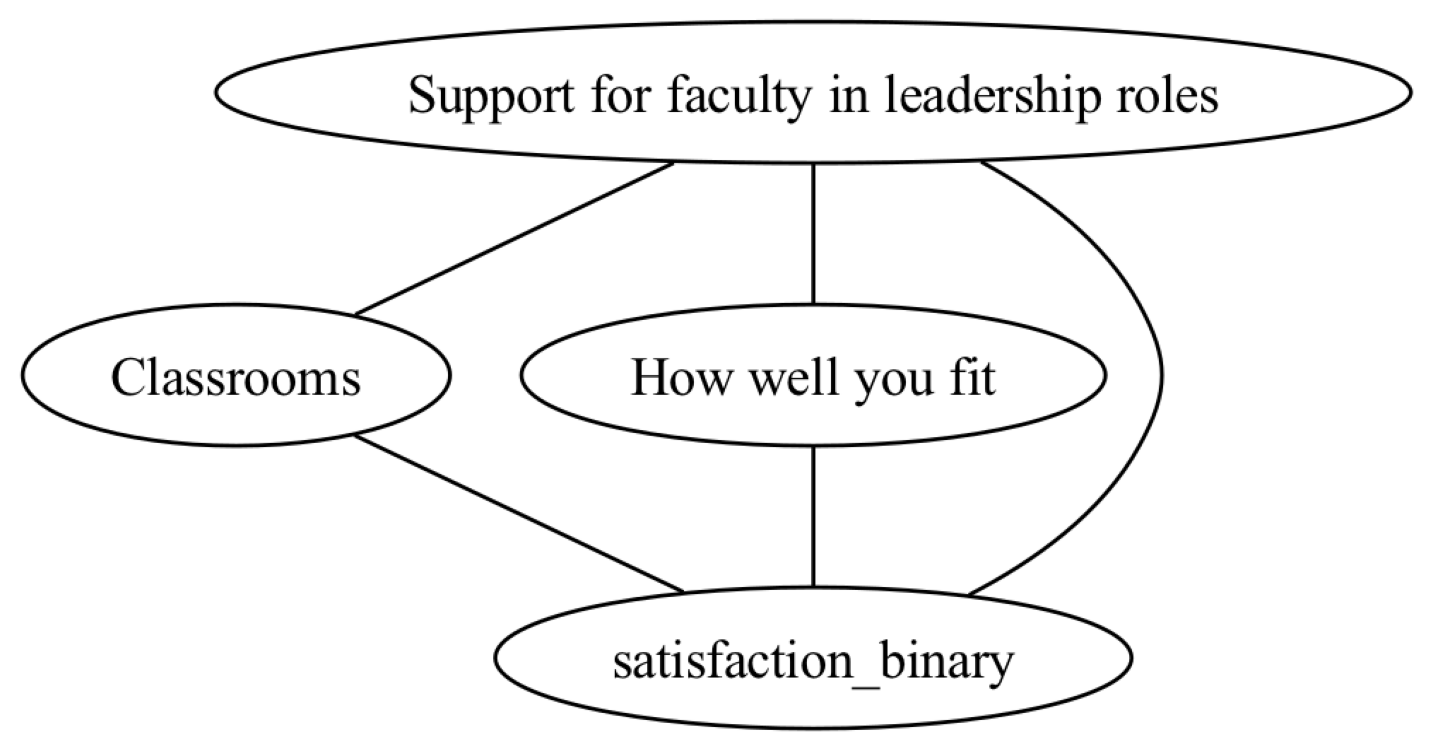

In [170]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import fisherz, kci,chisq
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Feature Selection using RFE
lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr, n_features_to_select=3)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected features:", list(selected_features))

# Step 2: Use selected features for MLP training
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

mlp.fit(X_train_rfe, y_train)
y_pred = mlp.predict(X_test_rfe)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 3: Prepare for Causal Discovery
X_for_Causal = X_imputed_df[selected_features].copy()
X_for_Causal['satisfaction_binary'] = data['binary_satisfaction']
X_for_Causal = X_for_Causal.dropna().astype(float)
X_np = X_for_Causal.to_numpy()

# Step 4: Create Node Labels
mapping_df = pd.read_excel("/Users/henrysalgado/Desktop/Coache Data Analysis/Variables.xlsx")
mapping_df['key'] = mapping_df['key'].str.lower()
name_dict = dict(zip(mapping_df['key'], mapping_df['name']))

original_colnames = [col.lower() for col in X_for_Causal.columns]
node_labels = [name_dict.get(col, col) for col in original_colnames]

# Step 5: Run PC Algorithm
print("_______PC_______")
cg_pc = pc(X_np, alpha=0.005, ci_test=chisq, node_names=node_labels)

# Visualize PC Graph
cg_pc.draw_pydot_graph()


Decision Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)


In [154]:

clf = DecisionTreeClassifier(
    criterion='gini',       
    max_depth=5,           
    min_samples_split=10,   
    random_state=42
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 75  65]
 [ 43 390]]
              precision    recall  f1-score   support

         0.0       0.64      0.54      0.58       140
         1.0       0.86      0.90      0.88       433

    accuracy                           0.81       573
   macro avg       0.75      0.72      0.73       573
weighted avg       0.80      0.81      0.81       573



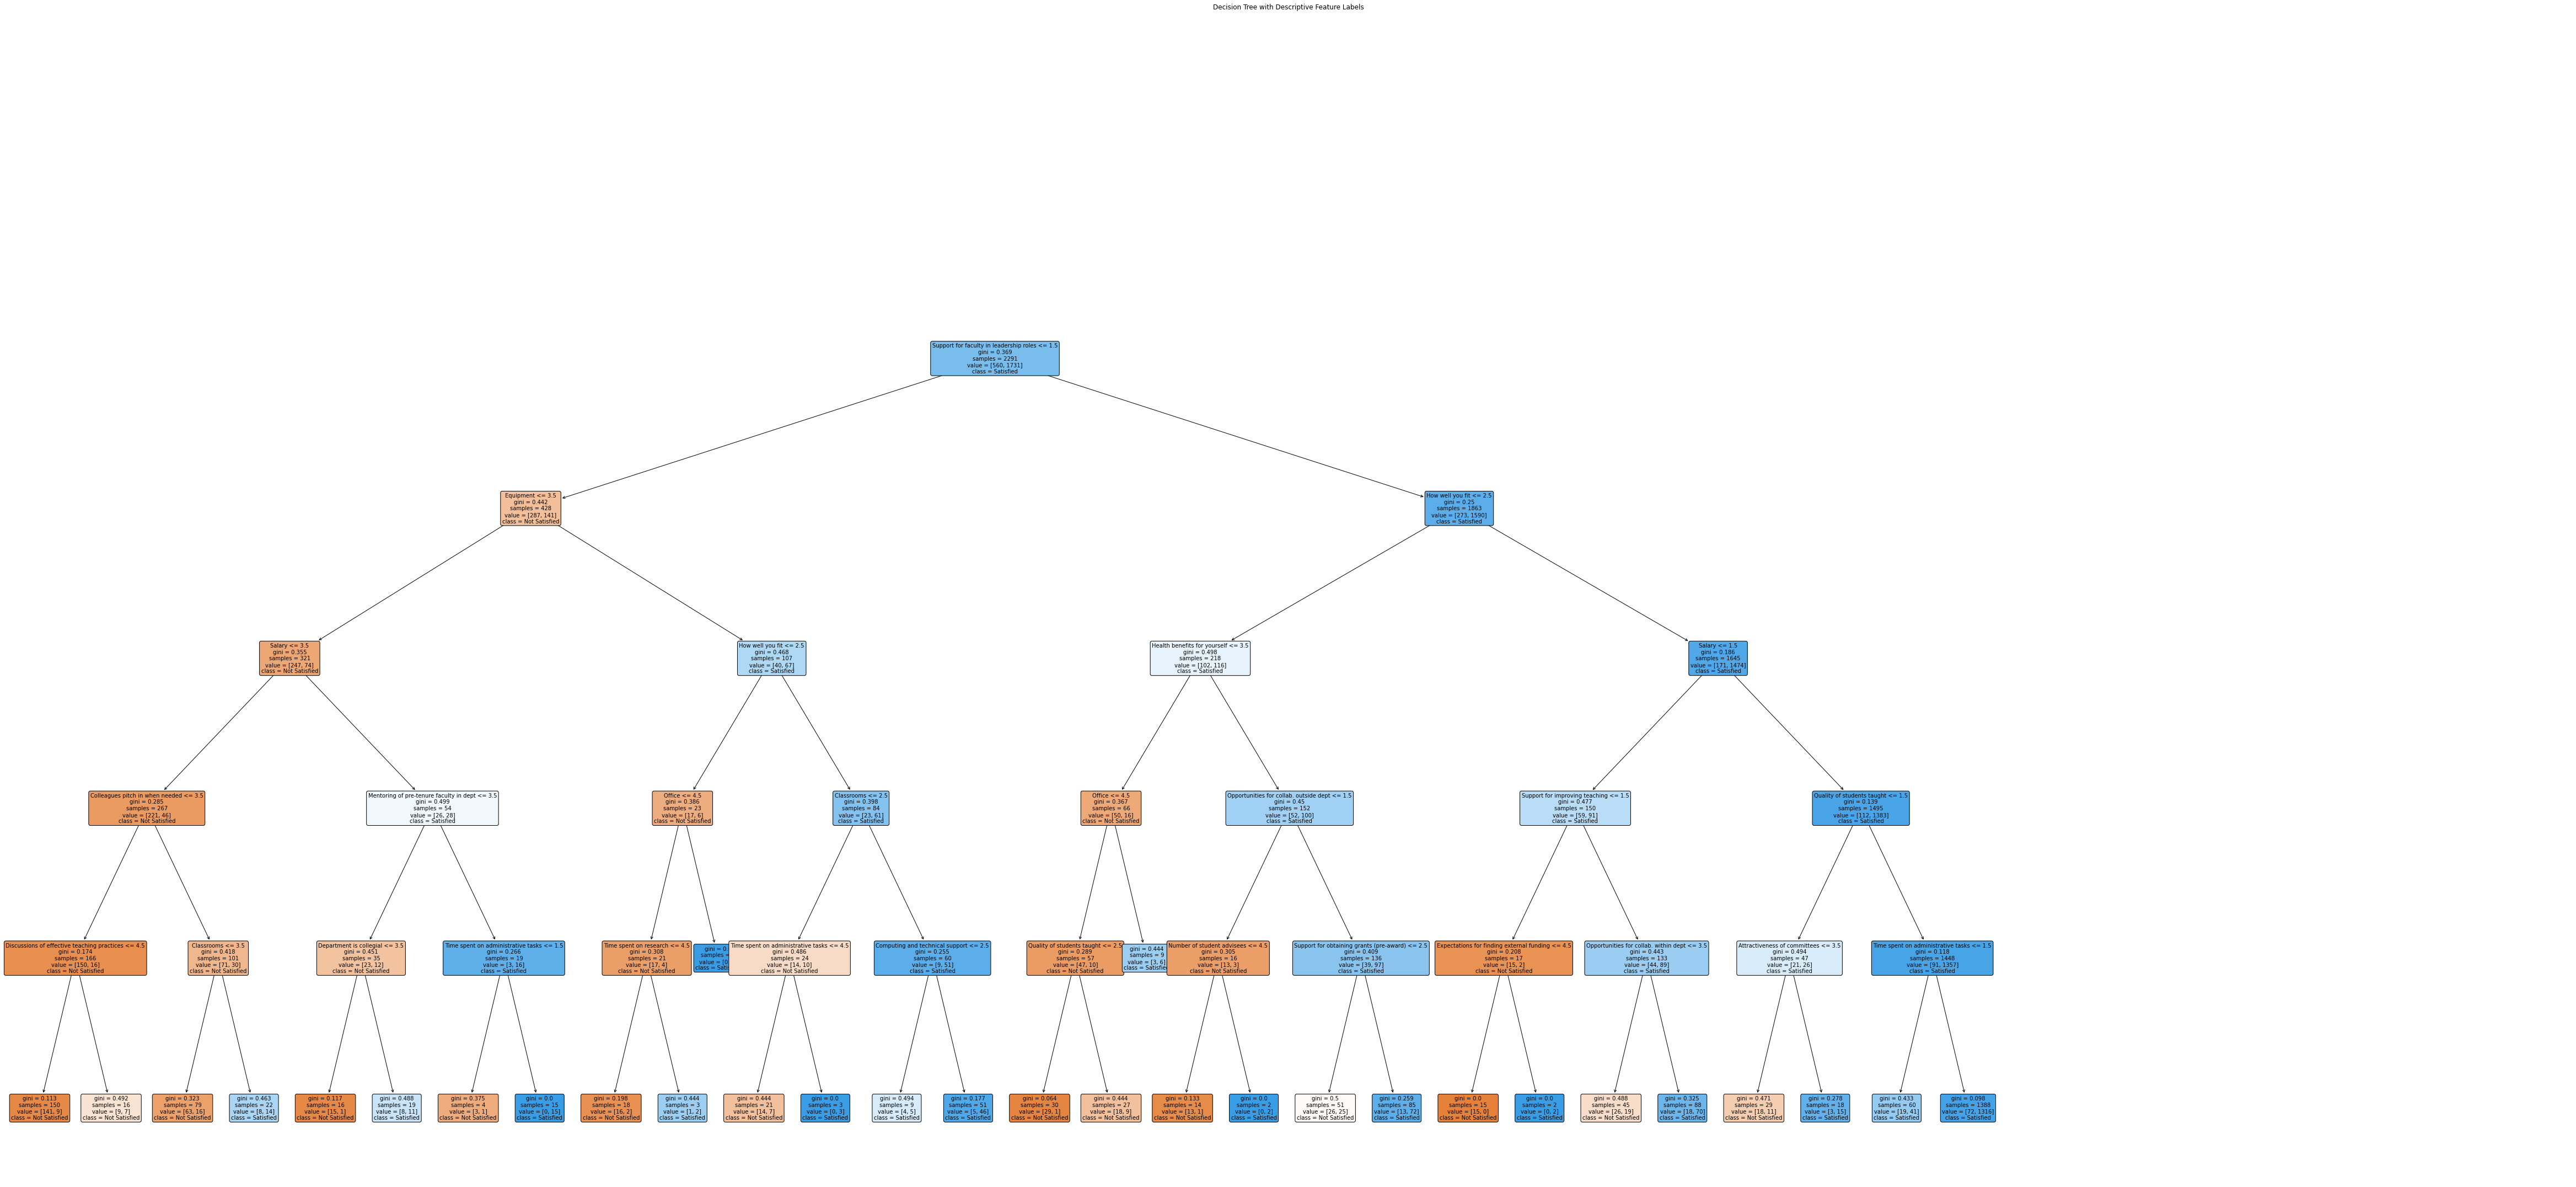

In [155]:
mapping_df = pd.read_excel("/Users/henrysalgado/Desktop/Coache Data Analysis/Variables.xlsx")
mapping_df['key'] = mapping_df['key'].str.lower()
name_dict = dict(zip(mapping_df['key'], mapping_df['name']))

feature_labels = [
    name_dict.get(feat.lower(), feat) for feat in X_train.columns
]

plt.figure(figsize=(65, 30))
plot_tree(
    clf,
    feature_names=feature_labels,
    class_names=['Not Satisfied', 'Satisfied'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree with Descriptive Feature Labels")
plt.show()

